In [17]:
from spleen_dataset.dataloader import SpleenDataloader, SpleenDataset, get_training_augmentation
from spleen_dataset.utils import get_list_of_patients
from spleen_dataset.config import dataset_folder
from batchgenerators.utilities.data_splitting import get_split_deterministic
import numpy as np
import matplotlib.pyplot as plt
import random

In [18]:
patients = get_list_of_patients(dataset_folder)
print(patients)

['10', '12', '13', '14', '16', '17', '18', '19', '2', '20', '21', '22', '24', '25', '26', '27', '28', '29', '3', '31', '32', '33', '38', '40', '41', '44', '45', '46', '47', '49', '52', '53', '56', '59', '6', '60', '61', '62', '63', '8', '9']


In [19]:
dataset = SpleenDataset(patients, only_non_empty_slices=False)
len(dataset)

3650

In [20]:
dataset = SpleenDataset(patients, only_non_empty_slices=True)
len(dataset)

1051

In [21]:
train, val = get_split_deterministic(patients, fold=0, num_splits=5, random_state=12345)

In [22]:
print(train)

['12' '16' '18' '19' '2' '20' '21' '22' '24' '25' '26' '27' '28' '29' '3'
 '32' '38' '40' '41' '45' '46' '49' '52' '53' '59' '6' '60' '61' '62' '63'
 '8' '9']


In [23]:
print(val)

['10' '13' '14' '17' '31' '33' '44' '47' '56']


In [24]:
patch_size = (128, 128)
batch_size = 1

In [25]:
train_dataset = SpleenDataset(train, only_non_empty_slices=True)
train_augmentation = get_training_augmentation(patch_size)
train_dataloader = SpleenDataloader(train_dataset, batch_size, train_augmentation)
print(len(train_dataloader))

859


In [26]:
val_dataset = SpleenDataset(val)
val_dataloader = SpleenDataloader(val_dataset, batch_size, patch_size)
print(len(val_dataloader))

633


(512, 512)
(512, 512)


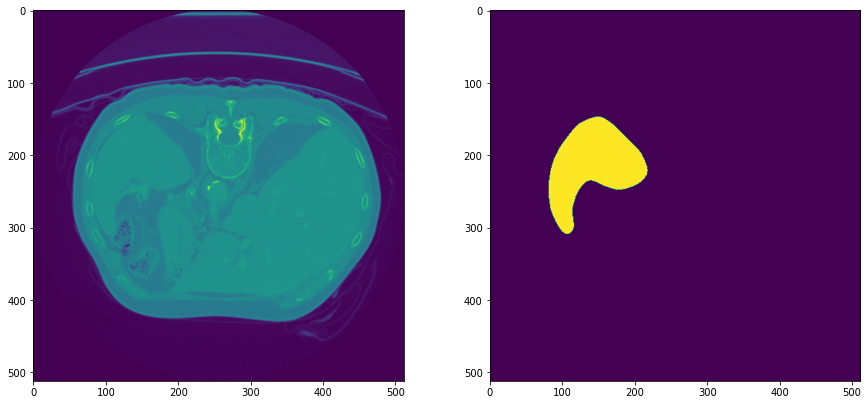

In [27]:
id = random.randint(0, len(train_dataset))
image, label = train_dataset[id]

print(image.shape)
print(label.shape)

fig = plt.figure(figsize=(15, 15))

ax1 = fig.add_subplot(2,2,1)
ax1.imshow(image)
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(label)

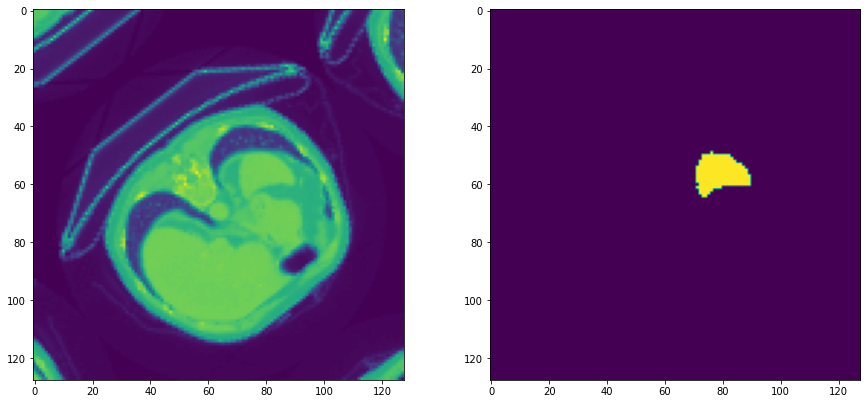

In [36]:
id = random.randint(0, len(train_dataloader))
images, labels = train_dataloader[id]

image = images[0]
label = labels[0]

fig = plt.figure(figsize=(15, 15))

ax1 = fig.add_subplot(2,2,1)
ax1.imshow(image)
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(label)